In [1]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c
import matplotlib.animation as ani
import logging, os
from datetime import datetime

## Set logger to log caching activity

In [2]:
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

## Reset cache location 

In [3]:
p21c.config['direc'] = '/lustre/aoc/projects/hera/wchin/21cmFAST-cache'

## Colorbar function

In [4]:
def colorbar(mappable, plot_color='white'):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.ylabel(f'Neutral Fraction, $x_{{HI}}$', color=plot_color)
    plt.tick_params(color=plot_color, labelcolor=plot_color)
    plt.sca(last_axes)
    
    ax.tick_params(color=plot_color, labelcolor=plot_color)
    
#     for spine in ax.spines.values():  # figure spine color
#         spine.set_edgecolor(plot_color)
    
    return cbar

## Cosmological Parameters (Default is used when no input is specified)

In [5]:
cosmo_params = p21c.CosmoParams()

## User Parameters, like box length, number of voxels (i.e. resolution) etc.

In [6]:
BOX_LEN=301  # 300, 301
HII_DIM=301  # 450, 301

user_params = p21c.UserParams(
    BOX_LEN=BOX_LEN,  # Box length in Mpc
    DIM=4*HII_DIM,      # Number of Voxels for hight resolution 
    HII_DIM=HII_DIM,  # Number of Voxels for low resolution 
    N_THREADS=os.cpu_count()
)

## Creating initial conditions box

In [7]:
start_time = datetime.now()
print(f'Excution qued at {start_time}')

init_cond = p21c.initial_conditions(
    cosmo_params=cosmo_params,
    user_params=user_params,
    direc='/lustre/aoc/projects/hera/wchin/21cmFAST-cache'
)

end_time = datetime.now()
execution_time = end_time - start_time
print(f'Execution completed at {end_time}')
print(f'Execution time = {execution_time}')

Excution qued at 2020-12-23 20:11:46.583355


2020-12-23 20:20:58,989 | INFO | Existing init_boxes found and read in (seed=230806296593).


Execution completed at 2020-12-23 20:20:59.678775
Execution time = 0:09:13.095420


## CHAMP Bootcamp

In [8]:
redshifts = np.array([8.5, 7.5, 6.5, 6.0])
R_BUBBLE_MAXES = np.array([15]*len(redshifts))
HII_EFF_FACTORS = np.array([30]*len(redshifts))

## Generate ionized boxes and total neutral fractions as a function of redshift

In [9]:
progress_status = True

ionized_boxes = np.zeros((len(redshifts), HII_DIM, HII_DIM, HII_DIM))
total_neutral_fractions = np.zeros(len(redshifts))

# print progress and local time
if progress_status:
    start_time = datetime.now()
    current_time = start_time
    print(f'Progress = 0%, localtime = {start_time}')

for i, z in enumerate(redshifts):
    ionized_boxes[i] = p21c.ionize_box(
        redshift=z, 
        init_boxes=init_cond,
        astro_params={
            'HII_EFF_FACTOR': HII_EFF_FACTORS[i],
            'R_BUBBLE_MAX': R_BUBBLE_MAXES[i]
        }
    ).xH_box
    total_neutral_fractions[i] = np.mean(ionized_boxes[i])

    # print progress and local time
    if progress_status:
        previous_time = current_time
        current_time = datetime.now()
        loop_time = current_time - previous_time
        elapsed_time = current_time - start_time
        print(f'progress = {int(round((i+1)*100/len(redshifts)))}%, \
localtime = {current_time}, loopexecuted in {loop_time}, elapsedtime = {elapsed_time}')
        
total_neutral_fractions

Progress = 0%, localtime = 2020-12-23 20:21:00.401606


2020-12-23 20:21:02,262 | INFO | Existing z=8.5 ionized boxes found and read in (seed=230806296593).


progress = 25%, localtime = 2020-12-23 20:21:02.369492, loopexecuted in 0:00:01.967886, elapsedtime = 0:00:01.967886


2020-12-23 20:21:04,292 | INFO | Existing z=7.5 ionized boxes found and read in (seed=230806296593).


progress = 50%, localtime = 2020-12-23 20:21:04.369718, loopexecuted in 0:00:02.000226, elapsedtime = 0:00:03.968112


2020-12-23 20:21:05,317 | INFO | Existing z=6.5 ionized boxes found and read in (seed=230806296593).


progress = 75%, localtime = 2020-12-23 20:21:05.412567, loopexecuted in 0:00:01.042849, elapsedtime = 0:00:05.010961


2020-12-23 20:21:07,281 | INFO | Existing z=6.0 ionized boxes found and read in (seed=230806296593).


progress = 100%, localtime = 2020-12-23 20:21:07.357222, loopexecuted in 0:00:01.944655, elapsedtime = 0:00:06.955616


array([0.73249981, 0.49493603, 0.1891804 , 0.07996972])

In [19]:
np.shape(ionized_boxes)

(4, 301, 301, 301)

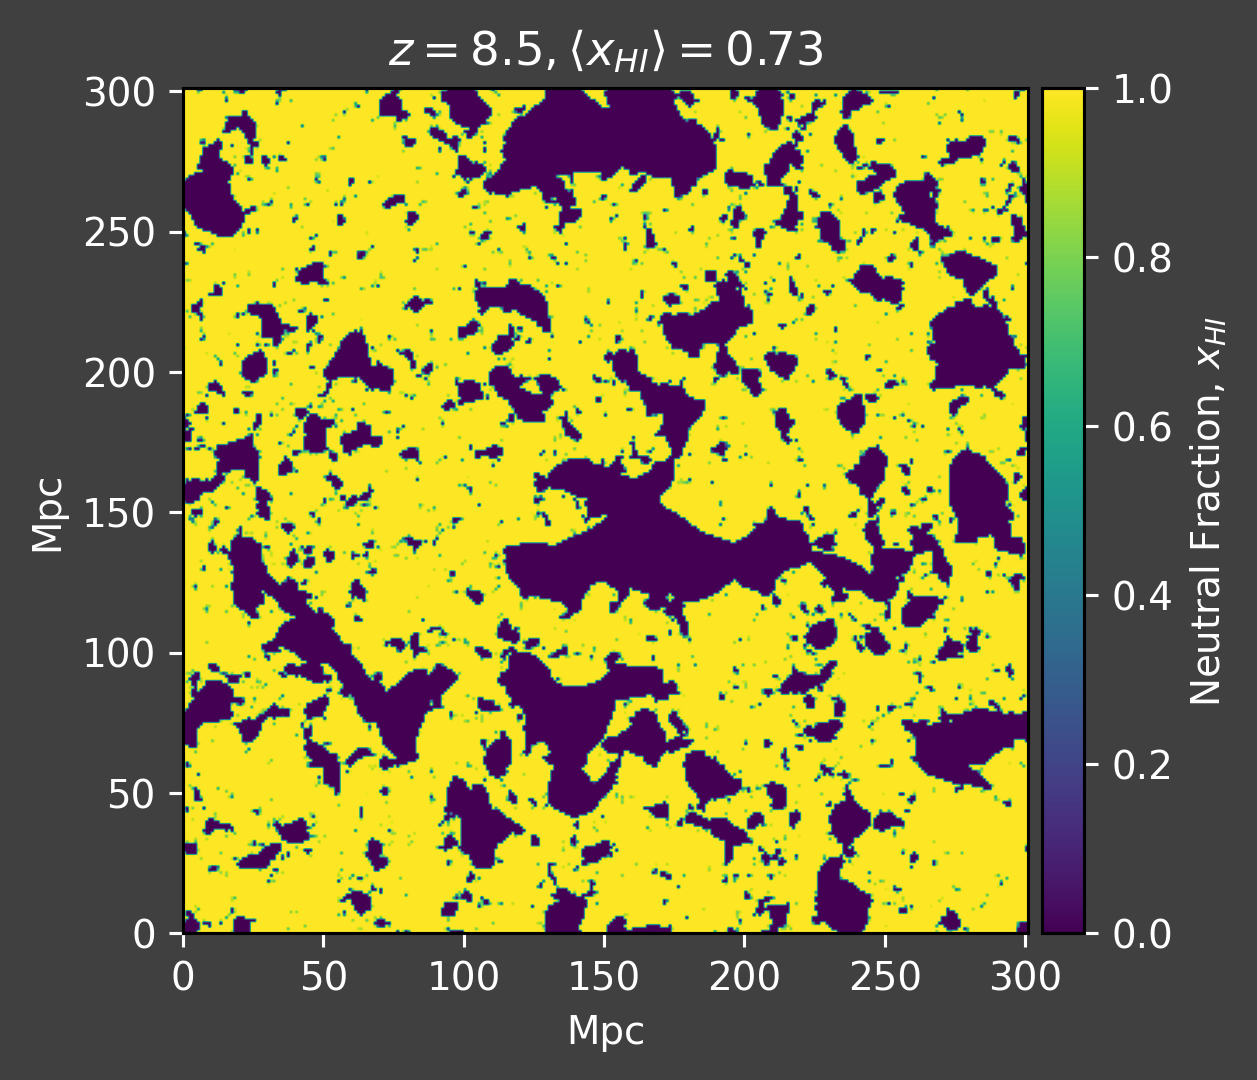

In [27]:
b = 0

plt.figure(dpi=279.75, facecolor='#404040')
color='w'
im = plt.imshow(
    ionized_boxes[b, 150, :, :], 
    extent=(0,np.shape(ionized_boxes[b, 150, :, :])[0],0,np.shape(ionized_boxes[b, 150, :, :])[1]), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
plt.title(f'$z = {redshifts[b]},$' r'$ \langle x_{{HI}} \rangle$' f'$={total_neutral_fractions[b]:.2f}$', color=color)
colorbar(im)
plt.xlabel('Mpc', color=color)
plt.ylabel('Mpc', color=color)
plt.show()

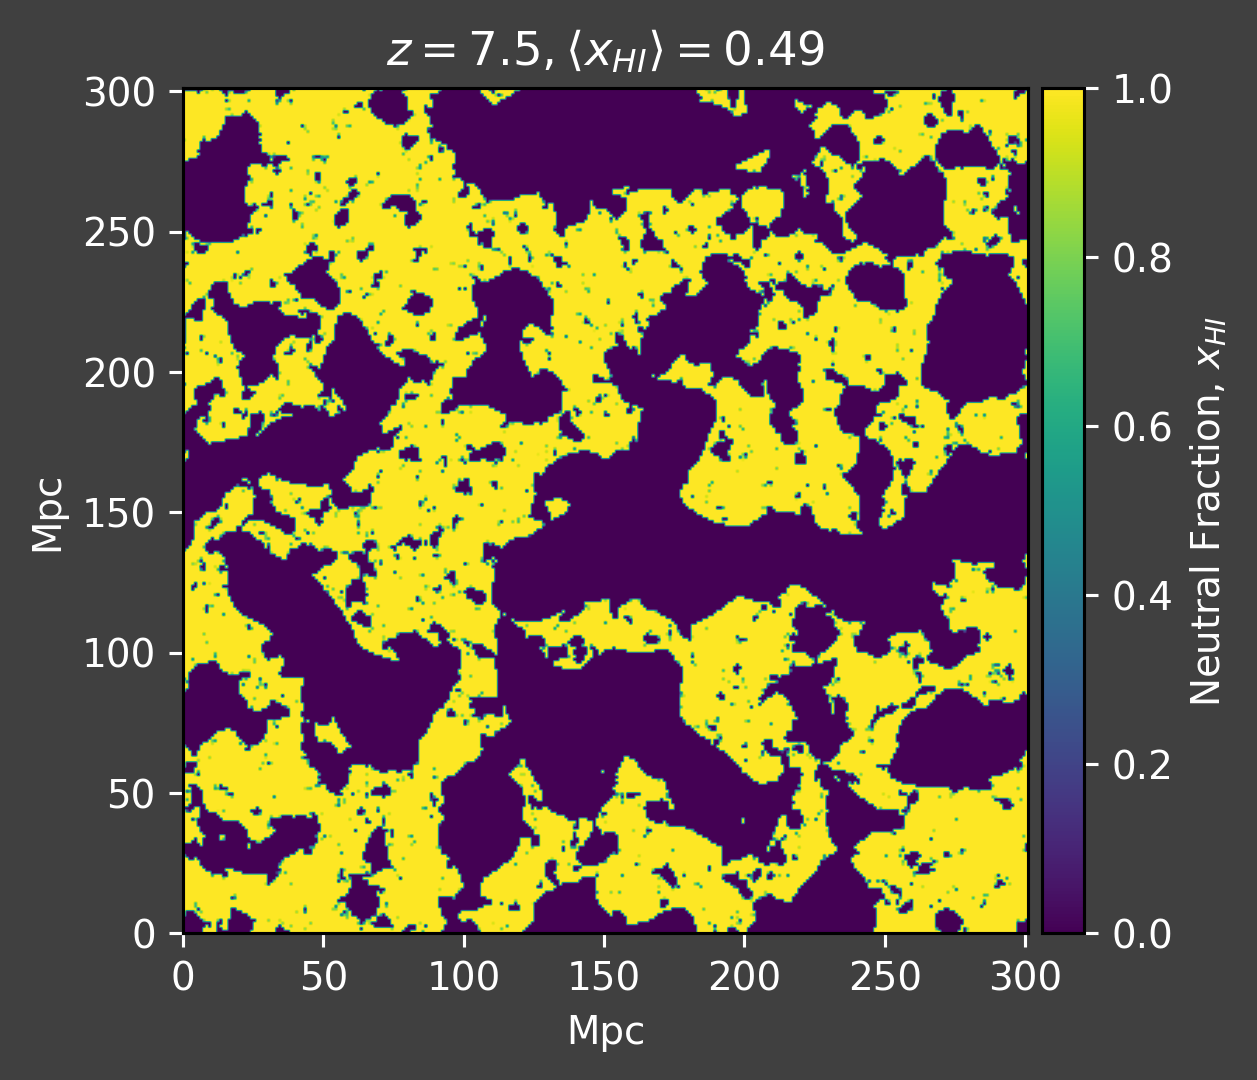

In [28]:
b = 1

plt.figure(dpi=279.75, facecolor='#404040')
color='w'
im = plt.imshow(
    ionized_boxes[b, 150, :, :], 
    extent=(0,np.shape(ionized_boxes[b, 150, :, :])[0],0,np.shape(ionized_boxes[b, 150, :, :])[1]), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
plt.title(f'$z = {redshifts[b]},$' r'$ \langle x_{{HI}} \rangle$' f'$={total_neutral_fractions[b]:.2f}$', color=color)
colorbar(im)
plt.xlabel('Mpc', color=color)
plt.ylabel('Mpc', color=color)
plt.show()

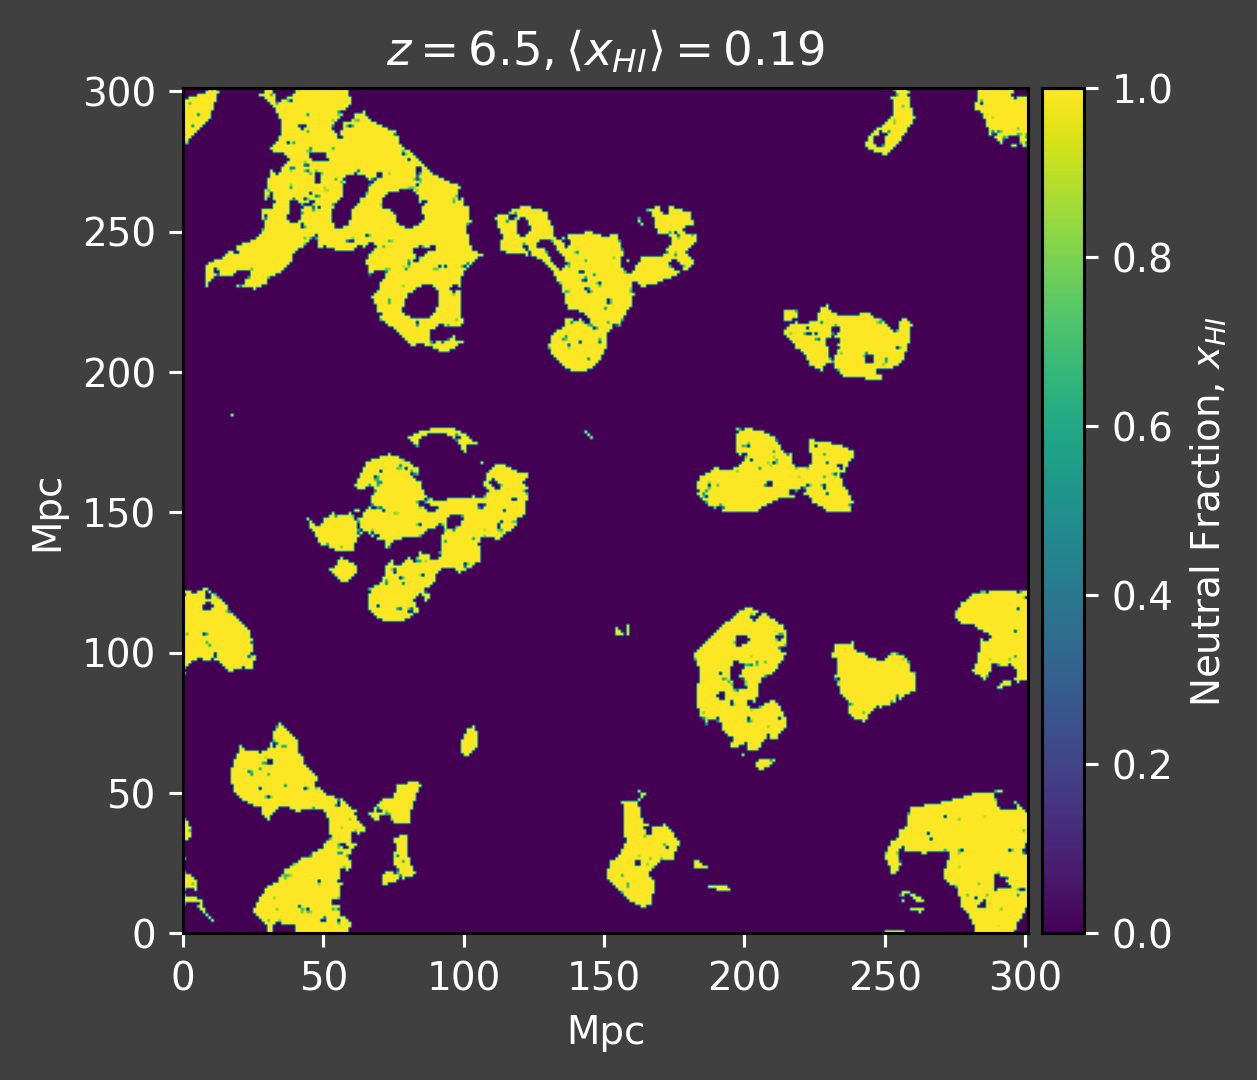

In [29]:
b = 2

plt.figure(dpi=279.75, facecolor='#404040')
color='w'
im = plt.imshow(
    ionized_boxes[b, 150, :, :], 
    extent=(0,np.shape(ionized_boxes[b, 150, :, :])[0],0,np.shape(ionized_boxes[b, 150, :, :])[1]), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
plt.title(f'$z = {redshifts[b]},$' r'$ \langle x_{{HI}} \rangle$' f'$={total_neutral_fractions[b]:.2f}$', color=color)
colorbar(im)
plt.xlabel('Mpc', color=color)
plt.ylabel('Mpc', color=color)
plt.show()

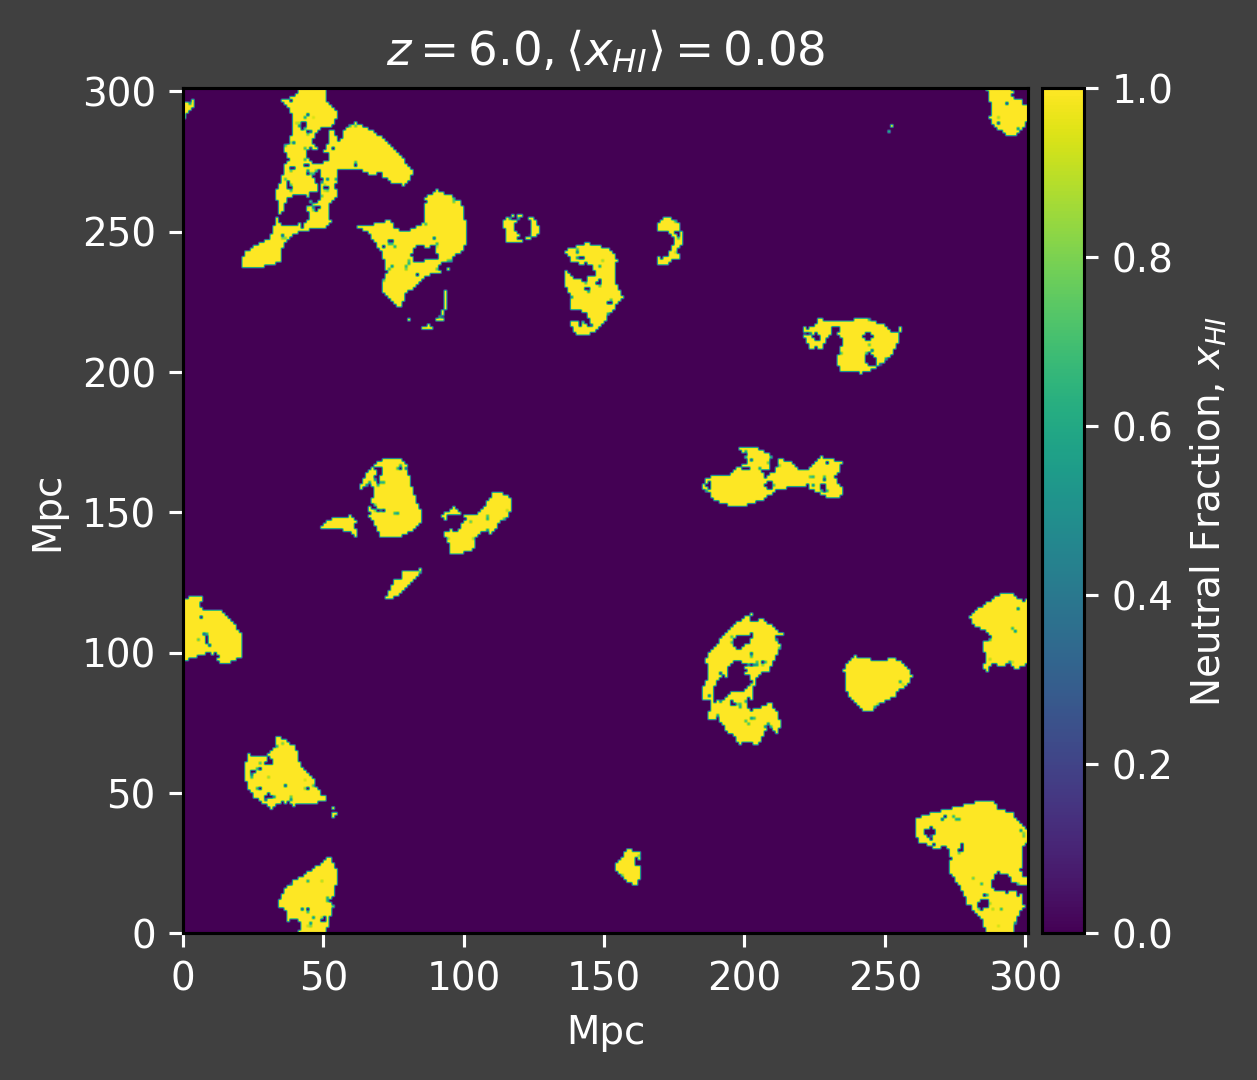

In [30]:
b = 3

plt.figure(dpi=279.75, facecolor='#404040')
color='w'
im = plt.imshow(
    ionized_boxes[b, 150, :, :], 
    extent=(0,np.shape(ionized_boxes[b, 150, :, :])[0],0,np.shape(ionized_boxes[b, 150, :, :])[1]), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
plt.title(f'$z = {redshifts[b]},$' r'$ \langle x_{{HI}} \rangle$' f'$={total_neutral_fractions[b]:.2f}$', color=color)
colorbar(im)
plt.xlabel('Mpc', color=color)
plt.ylabel('Mpc', color=color)
plt.show()